In [1]:
!pip install datasets evaluate transformers[sentencepiece]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


fast tokenizer使用RUST语言编写的；slow tokenizer是用python语言编写的。

当你对单个句子分词的时候，你看不出什么明显区别，甚至fast tokenizer可能会更慢。只有当同时**并行**对大量本文进行分词时，你可以看出明显的区别。

In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
example = "My name is Sylvain and I work at Hugging Face in Brooklyn."
encoding = tokenizer(example)
print(type(encoding))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

<class 'transformers.tokenization_utils_base.BatchEncoding'>


In [ ]:
tokenizer.is_fast

True

In [ ]:
encoding.is_fast

True

In [ ]:
encoding.tokens()

['[CLS]',
 'My',
 'name',
 'is',
 'S',
 '##yl',
 '##va',
 '##in',
 'and',
 'I',
 'work',
 'at',
 'Hu',
 '##gging',
 'Face',
 'in',
 'Brooklyn',
 '.',
 '[SEP]']

In [ ]:
encoding.word_ids()

[None, 0, 1, 2, 3, 3, 3, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, None]

In [ ]:
#encoding方法将一个词的索引（这里是3）映射到该词在文本中的字符范围
#word_to_chars返回单词在文本中的起始和结束位置
start, end = encoding.word_to_chars(3)
example[start:end] #提取从start到end之间的子字符串

'Sylvain'

In [3]:
from transformers import pipeline

token_classifier = pipeline("token-classification")
token_classifier("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

[{'entity': 'I-PER',
  'score': 0.99938285,
  'index': 4,
  'word': 'S',
  'start': 11,
  'end': 12},
 {'entity': 'I-PER',
  'score': 0.99815494,
  'index': 5,
  'word': '##yl',
  'start': 12,
  'end': 14},
 {'entity': 'I-PER',
  'score': 0.99590707,
  'index': 6,
  'word': '##va',
  'start': 14,
  'end': 16},
 {'entity': 'I-PER',
  'score': 0.99923277,
  'index': 7,
  'word': '##in',
  'start': 16,
  'end': 18},
 {'entity': 'I-ORG',
  'score': 0.9738931,
  'index': 12,
  'word': 'Hu',
  'start': 33,
  'end': 35},
 {'entity': 'I-ORG',
  'score': 0.976115,
  'index': 13,
  'word': '##gging',
  'start': 35,
  'end': 40},
 {'entity': 'I-ORG',
  'score': 0.9887976,
  'index': 14,
  'word': 'Face',
  'start': 41,
  'end': 45},
 {'entity': 'I-LOC',
  'score': 0.9932106,
  'index': 16,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

token-classification用于对文本中的每个token进行分类

token-classification通常用于命名实体识别(NER),它会标注文中的每个单词或子词为特定的类别（如：人名、地点名、组织名等）

下面这段代码唯一的不同就是加了aggregation_strategy="simple"这个参数。这个参数指定如何处理子词（subword）token。在文本处理中，某些词可能会被分成多个子词，该参数用来指定如何合并这些子词的分类结果。

“simple”聚合策略表示直接将所有子词的分类标签合并为一个标签，通常是将子词的标签通过简单规则合并成一个完整的标签。

In [ ]:
from transformers import pipeline

token_classifier = pipeline("token-classification", aggregation_strategy="simple")
token_classifier("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

所选的 aggregation_strategy 会改变为每个分组实体计算的分数。使用 "simple" 时，分数就是给定实体中每个标记的分数的平均值：例如，“Sylvain”的分数是前面示例中标记 S、##yl、##va 和 ##in 的分数的平均值。其他可用策略有：

"first"：每个实体的分数是该实体第一个标记的分数（所以对于“Sylvain”来说，它的分数是0.993828，即标记S的分数）。

"max"：每个实体的分数是该实体中所有标记的最大分数（所以对于“Hugging Face”来说，它的分数是0.98879766，即“Face”标记的分数）。

"average"：每个实体的分数是组成该实体的单词分数的平均值（所以对于“Sylvain”来说，这与"simple"策略没有区别，但对于“Hugging Face”，分数为0.9819，是“Hugging”的分数0.975和“Face”的分数0.98879的平均值）。

现在，让我们看看如何在不使用 pipeline() 函数的情况下获得这些结果！

In [4]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

model_checkpoint = "dbmdz/bert-large-cased-finetuned-conll03-english"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForTokenClassification.from_pretrained(model_checkpoint)

example = "My name is Sylvain and I work at Hugging Face in Brooklyn."
inputs = tokenizer(example, return_tensors="pt")
outputs = model(**inputs)

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
print(inputs["input_ids"].shape)
print(outputs.logits.shape)

torch.Size([1, 19])
torch.Size([1, 19, 9])


我们有一个包含19个token的sequence，其中有9个labels,所以得到的tensor形状是1，19,9

In [6]:
#probabilities包含第一个样本的所有类别的预测概率值，表示模型对每一个类别的信心
#predictions包含第一个样本的最终预测标签（即模型认为最有可能的类别）
import torch

probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)[0].tolist()
predictions = outputs.logits.argmax(dim=-1)[0].tolist()
print(predictions)

[0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 6, 6, 6, 0, 8, 0, 0]


In [7]:
model.config.id2label

{0: 'O',
 1: 'B-MISC',
 2: 'I-MISC',
 3: 'B-PER',
 4: 'I-PER',
 5: 'B-ORG',
 6: 'I-ORG',
 7: 'B-LOC',
 8: 'I-LOC'}

enumerate可以通过list()和for循环来访问。每次迭代时，他会返回一个元组，第一个元素是索引，第二个元素是对应位置的值


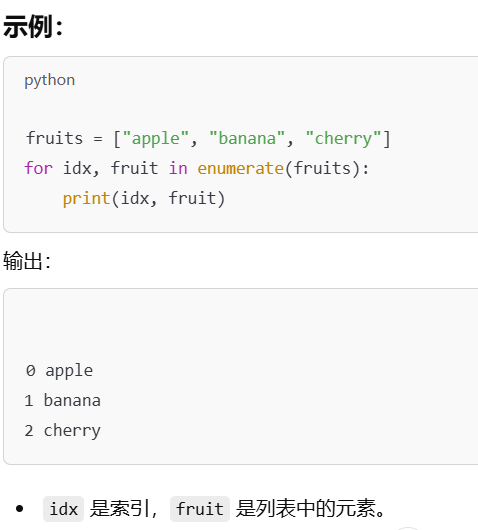

In [8]:
results = []
tokens = inputs.tokens()

for idx, pred in enumerate(predictions):
  label = model.config.id2label[pred]
  if label != "0":
    results.append(
        {"entity": label, "score": probabilities[idx][pred], "word": tokens[idx]}
    )

print(results)

[{'entity': 'O', 'score': 0.9994322657585144, 'word': '[CLS]'}, {'entity': 'O', 'score': 0.9989631175994873, 'word': 'My'}, {'entity': 'O', 'score': 0.999708354473114, 'word': 'name'}, {'entity': 'O', 'score': 0.9998350143432617, 'word': 'is'}, {'entity': 'I-PER', 'score': 0.9993828535079956, 'word': 'S'}, {'entity': 'I-PER', 'score': 0.9981548190116882, 'word': '##yl'}, {'entity': 'I-PER', 'score': 0.995907187461853, 'word': '##va'}, {'entity': 'I-PER', 'score': 0.9992327690124512, 'word': '##in'}, {'entity': 'O', 'score': 0.999804675579071, 'word': 'and'}, {'entity': 'O', 'score': 0.9995046854019165, 'word': 'I'}, {'entity': 'O', 'score': 0.9996776580810547, 'word': 'work'}, {'entity': 'O', 'score': 0.999434769153595, 'word': 'at'}, {'entity': 'I-ORG', 'score': 0.9738931059837341, 'word': 'Hu'}, {'entity': 'I-ORG', 'score': 0.9761149883270264, 'word': '##gging'}, {'entity': 'I-ORG', 'score': 0.9887974858283997, 'word': 'Face'}, {'entity': 'O', 'score': 0.9995326995849609, 'word': 'in

In [9]:
inputs_with_offsets = tokenizer(example, return_offsets_mapping=True)
inputs_with_offsets["offset_mapping"]

#return_offsets_mapping 返回每个token对应原始文本中的起始和结束位置的字符偏移量

[(0, 0),
 (0, 2),
 (3, 7),
 (8, 10),
 (11, 12),
 (12, 14),
 (14, 16),
 (16, 18),
 (19, 22),
 (23, 24),
 (25, 29),
 (30, 32),
 (33, 35),
 (35, 40),
 (41, 45),
 (46, 48),
 (49, 57),
 (57, 58),
 (0, 0)]

当你需要对每个token进行标注、分类和识别时，offset_mapping可以帮助你将token和其在原始文本中的位置关联起来。

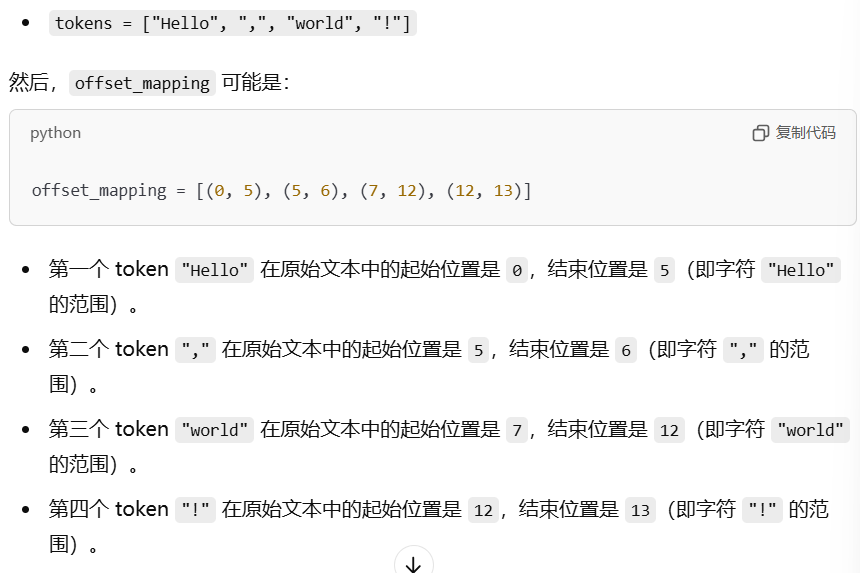

In [10]:
example[12:14]

'yl'

In [13]:
#在之前的基础上加上off_mapping来获取每一个token的位置

results = []
inputs_with_offsets = tokenizer(example, return_offsets_mapping=True)
tokens = inputs_with_offsets.tokens()
offsets = inputs_with_offsets["offset_mapping"]

for idx, pred in enumerate(predictions):
  label = model.config.id2label[pred]
  if label != "0":
    start, end = offsets[idx]
    results.append(
        {
            "entity": label,
            "score": probabilities[idx][pred],
            "word": tokens[idx],
            "start": start,
            "end": end,
        }
    )

print(results)

[{'entity': 'O', 'score': 0.9994322657585144, 'word': '[CLS]', 'start': 0, 'end': 0}, {'entity': 'O', 'score': 0.9989631175994873, 'word': 'My', 'start': 0, 'end': 2}, {'entity': 'O', 'score': 0.999708354473114, 'word': 'name', 'start': 3, 'end': 7}, {'entity': 'O', 'score': 0.9998350143432617, 'word': 'is', 'start': 8, 'end': 10}, {'entity': 'I-PER', 'score': 0.9993828535079956, 'word': 'S', 'start': 11, 'end': 12}, {'entity': 'I-PER', 'score': 0.9981548190116882, 'word': '##yl', 'start': 12, 'end': 14}, {'entity': 'I-PER', 'score': 0.995907187461853, 'word': '##va', 'start': 14, 'end': 16}, {'entity': 'I-PER', 'score': 0.9992327690124512, 'word': '##in', 'start': 16, 'end': 18}, {'entity': 'O', 'score': 0.999804675579071, 'word': 'and', 'start': 19, 'end': 22}, {'entity': 'O', 'score': 0.9995046854019165, 'word': 'I', 'start': 23, 'end': 24}, {'entity': 'O', 'score': 0.9996776580810547, 'word': 'work', 'start': 25, 'end': 29}, {'entity': 'O', 'score': 0.999434769153595, 'word': 'at',

In [14]:
example[33:45]

'Hugging Face'

以下这段代码的目的是对模型的预测结果进行处理，特别是针对**实体分组（B-和I-标签）**进行合并，并计算出该组实体的平均分数（score）。

它主要用于命名实体识别（NER）任务，尤其是处理**B-I-序列标注**（即实体的开始标记B-和内部标记I-）

In [16]:
import numpy as np

results = []
inputs_with_offsets = tokenizer(example, return_offsets_mapping=True)
tokens = inputs_with_offsets.tokens()
offsets = inputs_with_offsets["offset_mapping"]

idx = 0
while idx < len(predictions):
    pred = predictions[idx]
    label = model.config.id2label[pred]
    if label != "O":
        #判断实体标签并移除B-/I-前缀
        label = label[2:]
        start, _ = offsets[idx]

        ##处理连续的I-label（内部标签）
        all_scores = []
        while (
            idx < len(predictions)
            and model.config.id2label[predictions[idx]] == f"I-{label}"
        ):
            all_scores.append(probabilities[idx][pred])
            _, end = offsets[idx]
            idx += 1

        # The score is the mean of all the scores of the tokens in that grouped entity
        score = np.mean(all_scores).item()
        word = example[start:end]
        results.append(
            {
                "entity_group": label,
                "score": score,
                "word": word,
                "start": start,
                "end": end,
            }
        )
    idx += 1

print(results)

[{'entity_group': 'PER', 'score': 0.998169407248497, 'word': 'Sylvain', 'start': 11, 'end': 18}, {'entity_group': 'ORG', 'score': 0.9796018600463867, 'word': 'Hugging Face', 'start': 33, 'end': 45}, {'entity_group': 'LOC', 'score': 0.99321049451828, 'word': 'Brooklyn', 'start': 49, 'end': 57}]
